<a href="https://colab.research.google.com/github/mykhailo-kaliapin/Cat-In-A-Dark-Room-With-Boxes/blob/main/Black_Cat_In_A_(Very)_Dark_Room_With_Some_Boxes_(Or_Not).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1. Problem

В темній кімнаті розміром n x n клітинок знаходяться механічний кіт і певна кількість випадково розташованих нерухомих коробок.
Напишіть програму, що дозволить коту знайти і залізти в кожну з коробок, бажано за меншу кількість ходів.
Умови наступні:
1. Кіт і коробка займають одну клітинку в кімнаті
2. Кіт бачить не більш ніж на 3 клітинки навколо себе.
3. Кіт може переміщуватись по кімнаті на 1 клітинку за хід у любому напрямку включно с діагональним
4. Кіт починає пошук з довільної клітинки в кімнаті.

Ми очікуємо на програму для симуляції подорожі кота, а також оцінки розрахункової складності алгоритму для кращого або гіршого сценаріях пошуку.
Чи буде залежати цей результат від розташування початкової клітинки?

## *Note

From the problem statement, the condition #2 brought an ambiguous conclusion. Two possible scenarios of the cat's visibility range were derived.

The cat sees either:
1) by 3 cells deep 360-degree around itself; or
2) only 3 neighboring cells.

>The scenario 1 was chosen as it: a) sparked more interest in the developer; b) seemed to be more difficult.

# PART 2. Solution

## Logic

Step 1. Initialize the room of n x n cells with a specified number of randomly generated boxes coordinates and starting cell for the cat.

Step 2. WHILE there are still unvisited cells in the room:

>Step 2.1. Check all cells within the cat's visibility range for boxes (in our case, a 7 x 7 grid with the starting cell in the center) ignoring already visited and marking the ones that are seen for the first time as visited.

>Step 2.2. IF a box is encountered, assign it as a target for the the chosen pathfinding algorithm* to find the shortest possible path to it. If multiple boxes are encountered, visit them one by one. Build the path and add it to the path list of coordinates. The target is reassigned as a new starting point. And the next cell in line in the traversal algorithm** becomes the target. Repeat the pathfinding algorithm. The target is reassigned as a new starting point. Go back to step 2.1.

>Step 2.3. IF the visible grid does not contain any boxes, move the cat 1 cell according to the chosen traversal algorithm and reassign it as a new starting point. Go back to step 2.1.

Step 3. Output the cat's journey.


### *Pathfinding Algorithms

The choice of a pathfinding algorithm depends on factors such as the size of the search space, the presence of obstacles or weights, the accuracy requirements of the solution, and the available computational resources. It's important to consider these factors and select the algorithm that best suits the specific problem at hand.

Here are Top-3 pathfinding algorithms for our problem:

1. Dijkstra's Algorithm: Dijkstra's algorithm guarantees finding the shortest path in terms of the total cost or distance traveled. It explores all possible paths from the start node to the goal node and selects the one with the minimum cost. Dijkstra's algorithm is suitable for situations where finding the absolute shortest path is necessary.
2. A* Algorithm: A* (A-star) algorithm is an extension of Dijkstra's algorithm that incorporates heuristics to guide the search and improve efficiency. It uses a combination of the actual cost of the path from the start node and an estimated cost to the goal node (heuristic) to prioritize the exploration. A* algorithm is often faster than Dijkstra's algorithm, especially in large search spaces, and is commonly used in various applications.
3. Breadth-First Search (BFS): BFS is an algorithm that explores all neighboring nodes at the current level before moving to the next level. It guarantees finding the shortest path in terms of the number of edges traversed. BFS is suitable for unweighted graphs or grids and is often used when the search space is not too large.

>Let's choose the **dijkstra's algorithm**, as it should yield the shortest possible path between two cells.

### **Traversal Algorithms

To find the shortest way, we have to traverse the whole array in least amount of steps. To do it, we have to move cell by cell choosing the directions that would at the same time:
*   open up the highest number of unvisited cells; and
*   not create 'closed pockets of unvisited cells'.

The picture below shows:

>a) spiral traversing algorithm;

>b) column-/row-based snake traversing algorithm;

>c) wierd experimentation :)

>d) zigzag snake traversing algorithm.

And the numbers above each graph is a number of steps that has to be made in order to visit all the cells.

Option d) is a product of experimentation that yielded a 11.11% better result compared to the classic methods a) and b) on a 12 x 12 sample 2d array.

![Traversal Algorithms](https://drive.google.com/uc?export=view&id=1A5XUmbKYck-OTBdBvOKP_ZoEPFKyMdnn)

>For simplicity, let's choose the **column-/row-based snake algorithm** to tackle our problem.

## Code

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def initialize_room(n_cells, num_boxes):
    '''
    A function to initialize a square room of n x n cells with a specified
    number of randomly generated boxes and starting position for the kitty to play.

    Args:
        n_cells (int): a number that represents the number of rows and columns in the room array
        num_boxes (int): a specified number of boxes that should be initialized in the room array

    Returns:
        room (2d ndarray): a 2d numpy array representing the room
        showroom (list[list]): a list of lists showcasing the room with boxes and the cat
        boxes_coords (list[list]): a list of lists with cell coordinates of the initialized boxes
        cat_coords (list): a list with cell coordinates of the initialized cat
    '''
    room = np.zeros((n_cells, n_cells))
    showroom = [[0] * n_cells for _ in range(n_cells)]

    # Generate random room cell coordinates for boxes
    # dim is dimensionality of coordinates (in our case 2)
    dim = 2
    boxes_coords = [list(x) for x in np.random.randint(n_cells, size=(num_boxes, dim))]
    boxes_coords.sort()

    # Place the boxes in the showroom marking each with an 'X'
    for b in boxes_coords:
      showroom[b[0]][b[1]] = 'X'

    # Generate a random starting room cell to place the cat in avoiding the cells with boxes
    while True:
      cat_coords = [np.random.randint(0, n_cells), np.random.randint(0, n_cells)]
      if cat_coords not in boxes_coords:
        break

    # Place the cat in the showroom marking it with a 'C'
    showroom[cat_coords[0]][cat_coords[1]] = 'C'

    return room, showroom, boxes_coords, cat_coords




def valid_room_cell(cell, size_of_grid):
    """
    A function that checks if a cell is within the room boundaries
    """
    if cell[0] < 0 or cell[0] >= size_of_grid:
        return False
    if cell[1] < 0 or cell[1] >= size_of_grid:
        return False
    return True




def valid_grid_cell(cell):
    """
    A function that checks if a grid cell is within the room boundaries
    """
    if cell[0] < 0 or cell[0] >= len(room):
        return False
    if cell[1] < 0 or cell[1] >= len(room[0]):
        return False
    return True




def up(cell):
    ''' A function to move one cell up '''
    return (cell[0]-1, cell[1])

def up_d_right(cell):
    ''' A function to move one cell up diagonally right '''
    return (cell[0]-1, cell[1]+1)

def up_d_left(cell):
    ''' A function to move one cell up diagonally left'''
    return (cell[0]-1, cell[1]-1)

def down(cell):
    ''' A function to move one cell down '''
    return (cell[0]+1, cell[1])

def down_d_right(cell):
    ''' A function to move one cell down diagonally right'''
    return (cell[0]+1, cell[1]+1)

def down_d_left(cell):
    ''' A function to move one cell down diagonally left '''
    return (cell[0]+1, cell[1]-1)

def left(cell):
    ''' A function to move one cell left '''
    return (cell[0], cell[1]-1)

def right(cell):
    ''' A function to move one cell right '''
    return (cell[0], cell[1]+1)




def up_left_corner(start_cell, limit):
    '''
    A function to define coordinates for the cat to move from the start cell to
    the upper left corner of the room.

    Args:
        start_cell (list): starting coordinates of the cat in the room
        limit (int): a specified number of cells that the cat can see around it

    Returns:
        list[list]: a list with coordinates of the cat's path from the start cell
        to the upper left corner of the room
    '''
    path_to_corner = []

    while True:

      path_to_corner.append(list(start_cell))

      if start_cell[0] > limit and start_cell[1] > limit:
        start_cell = up_d_left(start_cell)

      elif start_cell[0] > limit and start_cell[1] < limit:
        start_cell = up_d_right(start_cell)

      elif start_cell[0] > limit and start_cell[1] == limit:
        start_cell = up(start_cell)

      elif start_cell[0] == limit and start_cell[1] > limit:
        start_cell = left(start_cell)

      elif start_cell[0] < limit and start_cell[1] > limit:
        start_cell = down_d_left(start_cell)

      elif start_cell[0] < limit and start_cell[1] < limit:
        start_cell = down_d_right(start_cell)

      elif start_cell[0] < limit and start_cell[1] == limit:
        start_cell = down(start_cell)

      elif start_cell[0] == limit and start_cell[1] < limit:
        start_cell = right(start_cell)

      else:
        break

    return path_to_corner




def row_snake(room, limit):
    '''
    A function that creates a list with coordinates of elements in order to
    traverse the whole room in row-based order from upper left corner.

    Args:
        room (2d ndarray): a 2d numpy array representing the room
        limit (int): a specified number of cells that the cat can see around it

    Returns:
        list[list]: a list of lists representing coordinates of elements in order
        to traverse the whole room in row-based order from upper left corner
        considering the size of the limit
    '''
    output = []
    n = len(room)

    # Define the grid's boundaries
    top_row = limit
    mid_row = top_row
    bottom_row = (n - 1) - limit
    left_col = limit
    right_col = (n - 1) - limit

    while mid_row <= bottom_row:

      top_row = mid_row
      for i in range(left_col + 1, right_col + 1):
        output.append([top_row, i])

      if top_row == bottom_row: break

      if (n-1) - (top_row + (limit*2 +1)) >= limit:
        mid_row += limit*2 + 1
      else:
        mid_row = n - limit

      for i in range(top_row, mid_row):
        output.append([i, right_col])

      for i in range(right_col, left_col, -1):
        output.append([mid_row, i])

      if mid_row == bottom_row: break

      if (n-1) - (mid_row + (limit*2 + 1)) >= limit:
        top_row = mid_row
        mid_row += limit*2 + 1
      else:
        top_row = mid_row
        mid_row = (n - 1) - limit

      for i in range(top_row, mid_row + 1):
        output.append([i, left_col])

    return output




def spiral_coords(start_cell, limit):
    '''
    A function that traverses elements in a grid in spiral order inwards clockwise.

    Args:
        start_cell (list): coordinates of the cuurent cell
        limit (int): a specified number of cells that the cat can see around it

    Returns:
        list[list]: a list of lists representing coordinates of each element in
        a grid in spiral order outwards counterclockwise
    '''
    output = []

    # Define the grid's boundaries
    top_row = start_cell[0] - limit
    bottom_row = start_cell[0] + limit
    left_col = start_cell[1] - limit
    right_col = start_cell[1] + limit

    while top_row <= bottom_row and left_col <= right_col:

      for i in range(left_col, right_col + 1):
        output.append([top_row, i])
      top_row += 1

      for i in range(top_row, bottom_row + 1):
        output.append([i, right_col])
      right_col -= 1

      if top_row > bottom_row: break

      for i in range(right_col, left_col - 1, -1):
        output.append([bottom_row, i])
      bottom_row -= 1

      if left_col > right_col: break

      for i in range(bottom_row, top_row - 1, -1):
        output.append([i, left_col])
      left_col += 1

    return list(reversed(output[:-1]))




def obstacles_coords(start_cell, limit):
    '''
    A function that creates a list with coordinates of each element around a grid
    of 1 cell depth in circular order from upper left corner clockwise.

    Args:
        start_cell (list): coordinates of the cuurent cell
        limit (int): a specified number of cells that the cat can see around it

    Returns:
        list[list]: a list of lists representing coordinates of each element around a grid
    '''
    output = []

    # Define the grid's boundaries
    top_row = start_cell[0] - (limit + 1)
    bottom_row = start_cell[0] + (limit + 1)
    left_col = start_cell[1] - (limit + 1)
    right_col = start_cell[1] + (limit + 1)

    for i in range(left_col, right_col):
      output.append([top_row, i])

    for i in range(top_row, bottom_row):
      output.append([i, right_col])

    for i in range(right_col, left_col, -1):
      output.append([bottom_row, i])

    for i in range(bottom_row, top_row, -1):
      output.append([i, left_col])

    return output




def backtrack(start_cell, target, distances):
    '''
    A function to construct the path with the least number of steps from the
    tagret to the start cell
    '''
    path = [target]
    size_of_grid = distances.shape[0]

    while True:

      # check directions and choose the one that has the least distance
      potential_distances, potential_cells = [], []

      directions = [up, up_d_right, up_d_left, down, down_d_right, down_d_left, left, right]

      for direction in directions:
          cell = direction(path[-1])
          if valid_room_cell(cell, size_of_grid):
              potential_cells.append(list(cell))
              potential_distances.append(distances[cell[0], cell[1]])

      least_distance_index = np.argmin(potential_distances)
      path.append(potential_cells[least_distance_index])

      if path[-1][0] == start_cell[0] and path[-1][1] == start_cell[1]:
          break

    return list(reversed(path[:-1]))




def dijkstra(start_cell, target, room):
    """
    Dijkstra's algorithm for finding the shortest path between two cells in a graph.

    Args:
        start_cell (list): coordinates of the current start cell
        target (list): coordinates of the target cell
        room (2d ndarray): a 2d numpy array representing the room

    Returns:
        list[list]: list of lists of cells that form the shortest path from
        the start cell to the target
    """

    # initialize cost heuristic map
    room = room.copy()

    # normal tiles should have 1 cost (1 so we can backtrack)
    room += np.ones((room.shape))

    # source and destination are free
    room[start_cell[0], start_cell[1]] = 0
    room[target[0],target[1]] = 0

    # initialize maps for distances and visited cells
    size_of_floor = room.shape[0]

    # we only want to visit cells once
    visited = np.zeros([size_of_floor,size_of_floor], bool)

    # initiate matrix to keep track of distance to source cell
    # initial distance to cells is infinity so we always get a lower actual distance
    distances = np.ones([size_of_floor, size_of_floor]) * np.inf
    # start cell has a distance of 0 to itself
    distances[start_cell[0], start_cell[1]] = 0

    # start algorithm
    current_cell = [start_cell[0], start_cell[1]]

    while True:

        directions = [up, up_d_right, up_d_left, down, down_d_right, down_d_left, left, right]
        for direction in directions:
            potential_cell = direction(current_cell)
            if valid_room_cell(potential_cell, size_of_floor): # boundary checking
                if not visited[potential_cell[0],potential_cell[1]]: # check if we have visited this cell before
                    # update distance to cell
                    distance = distances[current_cell[0], current_cell[1]] + room[potential_cell[0],potential_cell[1]]

                    # update distance if it is the shortest discovered
                    if distance < distances[potential_cell[0],potential_cell[1]]:
                        distances[potential_cell[0],potential_cell[1]] = distance


        # mark current cell as visited
        visited[current_cell[0] , current_cell[1]] = True

        # select next cell
        # by choosing the shortest path so far
        t = distances.copy()

        # we don't want to visit cells that have already been visited
        t[np.where(visited)] = np.inf

        # choose the shortest path
        cell_index = np.argmin(t)

        # convert index to row, col
        cell_row = cell_index//size_of_floor
        cell_col = cell_index%size_of_floor

        # update current cell
        current_cell = (cell_row, cell_col)

        # stop if we have reached the desired cell
        if current_cell[0] == target[0] and current_cell[1]==target[1]:
          break

    # backtrack to construct path
    return backtrack(start_cell, target, distances)




def flatten(whole_path):
    '''
    A function to flatten the final path list being a list of lists of cells
    '''
    return [item for sublist in whole_path for item in sublist]




def catSearchRoom(start_cell, boxes_coords, room, limit):
    '''
    A function for the cat to search for and climb into all boxes in a dark room

    Args:
        start_cell (list): cell coordinates of the cat's initial position
        boxes_coords (list[list]): cell coordinates of the initialized boxes
        room (2d ndarray): a 2d numpy array representing the room
        limit (int): a specified number of cells that the cat can see around it

    Returns:
        len(visited_cells) (int): number of cells the cat has visited in the room
        boxes_found (list[list]): list of boxes the cat found
        visited_boxes (list[list]): list of boxes the cat visited
        len(visited_boxes) (int): number of boxes the cat has visited in the room
        whole_path (list[list]): path that the cat was searching the room by
    '''

    visited_cells, travesre_coords, whole_path = [], [], []

    # For simplicity, lets not divide the room into four quarters and move the cat to the closest corner, instead:
    # Always, move the cat into upper left corner to begin the traversal
    path_to_corner = up_left_corner(start_cell, limit)
    travesre_coords.append(path_to_corner)

    # coordinates in travesre_coords are going to be the ones to come back to for
    # iteration when all boxes from the grid are visited or no boxes are found
    snake_coords = row_snake(room, limit)
    travesre_coords.append(snake_coords)
    travesre_coords = flatten(travesre_coords)

    boxes_found = []

    for i in travesre_coords:

      boxes_found_grid = []
      start_cell = i

      grid_coords = spiral_coords(start_cell, limit)
      for g in grid_coords:
        if not valid_grid_cell(g):
          grid_coords.remove(g)

      # Add obstacles around the grid so that the cat does not try to peak outside
      obstacles = obstacles_coords(start_cell, limit)

      # assign the obstacles a value of 1000
      for o in obstacles:
        if valid_grid_cell(o):
          room[o[0]][o[1]] = 1000

      for g in grid_coords:

        if g not in visited_cells:
          if g in boxes_coords:
            boxes_found_grid.append(g)
            boxes_found.append(g)
          visited_cells.append(g)

      for cell in boxes_found_grid:
        if cell in path_to_corner:
          boxes_found_grid.remove(cell)

      for cell in boxes_found_grid:
        if cell in snake_coords:
          boxes_found_grid.remove(cell)


      if boxes_found_grid:

        for cell in boxes_found_grid:

          if valid_room_cell(cell, len(grid_coords)):

            whole_path.append(list(i))
            target = cell
            whole_path += dijkstra(start_cell, target, room)
            start_cell = whole_path[-1]


        # to simplify, for now let's get the cat from boxes back to the start cell
        target = i
        whole_path += dijkstra(start_cell, target, room)

        # Nullify the room cell values
        room *= np.zeros(room.shape)

      else:
        #if i not in whole_path:
          whole_path.append(list(i))
          #start_cell = whole_path[-1]
          # Nullify the room cell values
          room *= np.zeros(room.shape)

    visited_cells.sort()
    boxes_found.sort()

    if not boxes_found:
      return len(visited_cells), visited_cells, len(boxes_found), "Unfortunately, the cat did not find any boxes in the room, though it warmed up its metallic muscles quite well :)", whole_path

    else:
      return len(visited_cells), visited_cells, len(boxes_found), boxes_found, whole_path


## Result

### Case 1. Without Boxes

Room Initialization

In [ ]:
# Create the room specifying its size and number of boxes to place
n_cells = 20
num_boxes = 0
playground = initialize_room(n_cells, num_boxes)
room, showroom, boxes_coords, cat_coords = playground[0], playground[1], playground[2], playground[3]
start_cell = cat_coords
limit = 3

# Output the result
print("The room dimensions are: ", room.shape, '\n')
if boxes_coords:
  print("The boxes are positioned at: ", boxes_coords, '\n')
else:
  print("The boxes are positioned at: ", "The cat has been tricked :) There are no boxes in the room. But do not tell the cat...", '\n')
print("The beast is set loose at: ", cat_coords, '\n')
print("The cat's playground, where 'C' is the cat and 'X's are boxes: ", '\n')
for row in showroom:
    print(*row, sep="  ")

The room dimensions are:  (20, 20) 

The boxes are positioned at:  The cat has been tricked :) There are no boxes in the room. But do not tell the cat... 

The beast is set loose at:  [4, 13] 

The cat's playground, where 'C' is the cat and 'X's are boxes:  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  C  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0 

Cat Mission Commences...

In [ ]:
cat_path = catSearchRoom(start_cell, boxes_coords, room, limit)

# Output the result
print("Number of cells the cat has visited in the room is: ", cat_path[0], '\n')
print('These are: ', cat_path[1], '\n')
print("Number of boxes the cat has found in the room is: ", cat_path[2], '\n')
print('These are: ', cat_path[3], '\n')
#print('Visited boxes: ', cat_path[2], '\n')

print("Cat's path was: ", cat_path[4], '\n')
print("Number of cat's moves is: ", len(cat_path[4]) -1, '\n')

Number of cells the cat has visited in the room is:  400 

These are:  [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [2, 15], [2, 16], [2, 17], [2, 18], [2, 19], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [4, 15], [4, 16], [4, 17], [4, 18], [4, 19], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9]

Path Visualization

The beast is set loose at:  [4, 13] 

The boxes are positioned at:  [] 



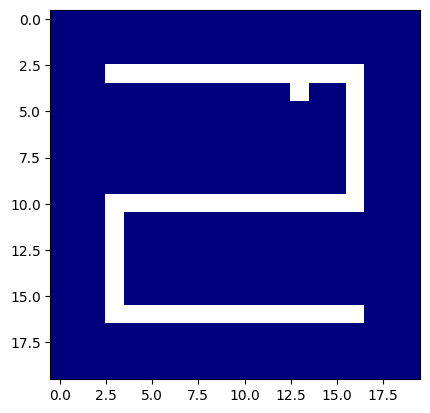

In [ ]:
# Visualize the cat's path in the room
path_visual = np.zeros(room.shape)
cat_path = cat_path[4]

print("The beast is set loose at: ", cat_coords, '\n')
print("The boxes are positioned at: ", boxes_coords, '\n')

for i in range(len(cat_path)):
  path_visual[cat_path[i][0], cat_path[i][1]] = np.nan

plt.imshow(path_visual + room, cmap='jet')
plt.show()

### Case 2. With 3 Boxes

Room Initialization

In [ ]:
# Create the room specifying its size and number of boxes to place
n_cells = 20
num_boxes = 3
playground = initialize_room(n_cells, num_boxes)
room, showroom, boxes_coords, cat_coords = playground[0], playground[1], playground[2], playground[3]
start_cell = cat_coords
limit = 3

# Output the result
print("The room dimensions are: ", room.shape, '\n')
if boxes_coords:
  print("The boxes are positioned at: ", boxes_coords, '\n')
else:
  print("The boxes are positioned at: ", "The cat has been tricked :) There are no boxes in the room. But do not tell the cat...", '\n')
print("The beast is set loose at: ", cat_coords, '\n')
print("The cat's playground, where 'C' is the cat and 'X's are boxes: ", '\n')
for row in showroom:
    print(*row, sep="  ")

The room dimensions are:  (20, 20) 

The boxes are positioned at:  [[3, 4], [7, 10], [18, 0]] 

The beast is set loose at:  [4, 3] 

The cat's playground, where 'C' is the cat and 'X's are boxes:  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  X  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  C  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  X  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0

Cat Mission Commences...

In [ ]:
cat_path = catSearchRoom(start_cell, boxes_coords, room, limit)

# Output the result
print("Number of cells the cat has visited in the room is: ", cat_path[0], '\n')
print('These are: ', cat_path[1], '\n')
print("Number of boxes the cat has found in the room is: ", cat_path[2], '\n')
print('These are: ', cat_path[3], '\n')
#print('Visited boxes: ', cat_path[2], '\n')

print("Cat's path was: ", cat_path[4], '\n')
print("Number of cat's moves is: ", len(cat_path[4]) -1, '\n')

Number of cells the cat has visited in the room is:  400 

These are:  [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [2, 15], [2, 16], [2, 17], [2, 18], [2, 19], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [4, 15], [4, 16], [4, 17], [4, 18], [4, 19], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9]

Path Visualization

The beast is set loose at:  [4, 3] 

The boxes are positioned at:  [[3, 4], [7, 10], [18, 0]] 



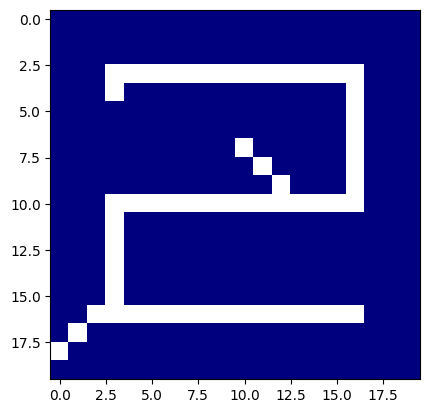

In [ ]:
# Visualize the cat's path in the room
path_visual = np.zeros(room.shape)
cat_path = cat_path[4]

print("The beast is set loose at: ", cat_coords, '\n')
print("The boxes are positioned at: ", boxes_coords, '\n')

for i in range(len(cat_path)):
  path_visual[cat_path[i][0], cat_path[i][1]] = np.nan

plt.imshow(path_visual + room, cmap='jet')
plt.show()

### Case 2. With 20 Boxes

Room Initialization

In [ ]:
# Create the room specifying its size and number of boxes to place
n_cells = 20
num_boxes = 20
playground = initialize_room(n_cells, num_boxes)
room, showroom, boxes_coords, cat_coords = playground[0], playground[1], playground[2], playground[3]
start_cell = cat_coords
limit = 3

# Output the result
print("The room dimensions are: ", room.shape, '\n')
if boxes_coords:
  print("The boxes are positioned at: ", boxes_coords, '\n')
else:
  print("The boxes are positioned at: ", "The cat has been tricked :) There are no boxes in the room. But do not tell the cat...", '\n')
print("The beast is set loose at: ", cat_coords, '\n')
print("The cat's playground, where 'C' is the cat and 'X's are boxes: ", '\n')
for row in showroom:
    print(*row, sep="  ")

The room dimensions are:  (20, 20) 

The boxes are positioned at:  [[1, 1], [1, 12], [2, 8], [2, 18], [3, 4], [5, 15], [7, 15], [8, 6], [10, 18], [11, 3], [12, 9], [14, 1], [14, 7], [14, 18], [15, 18], [16, 5], [17, 6], [19, 2], [19, 5], [19, 6]] 

The beast is set loose at:  [13, 14] 

The cat's playground, where 'C' is the cat and 'X's are boxes:  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  X  0  0  0  0  0  0  0  0  0  0  X  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  X  0  0  0  0  0  0  0  0  0  X  0
0  0  0  0  X  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  X  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  X  0  0  0  0
0  0  0  0  0  0  X  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  X 

Cat Mission Commences...

In [ ]:
cat_path = catSearchRoom(start_cell, boxes_coords, room, limit)

# Output the result
print("Number of cells the cat has visited in the room is: ", cat_path[0], '\n')
print('These are: ', cat_path[1], '\n')
print("Number of boxes the cat has found in the room is: ", cat_path[2], '\n')
print('These are: ', cat_path[3], '\n')
#print('Visited boxes: ', cat_path[2], '\n')

print("Cat's path was: ", cat_path[4], '\n')
print("Number of cat's moves is: ", len(cat_path[4]) -1, '\n')

Number of cells the cat has visited in the room is:  400 

These are:  [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [2, 15], [2, 16], [2, 17], [2, 18], [2, 19], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [4, 15], [4, 16], [4, 17], [4, 18], [4, 19], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9]

Path Visualization

The beast is set loose at:  [13, 14] 

The boxes are positioned at:  [[1, 1], [1, 12], [2, 8], [2, 18], [3, 4], [5, 15], [7, 15], [8, 6], [10, 18], [11, 3], [12, 9], [14, 1], [14, 7], [14, 18], [15, 18], [16, 5], [17, 6], [19, 2], [19, 5], [19, 6]] 



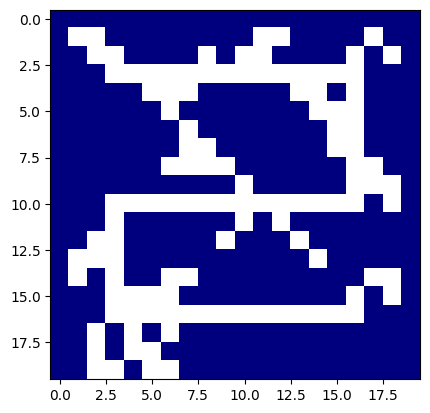

In [ ]:
# Visualize the cat's path in the room
path_visual = np.zeros(room.shape)
cat_path = cat_path[4]

print("The beast is set loose at: ", cat_coords, '\n')
print("The boxes are positioned at: ", boxes_coords, '\n')

for i in range(len(cat_path)):
  path_visual[cat_path[i][0], cat_path[i][1]] = np.nan

plt.imshow(path_visual + room, cmap='jet')
plt.show()

# PART 3. Q & A

## **Q1. Оцініть розрахункову складність алгоритму для кращого або гіршого сценарію пошуку.**

The main catSearchRoom function uses several helper functions.


1. initialize_room: O(n_cells^2) - since it always has to initialize a 2d array with zeros in it.
2. valid_room_cell and valid_grid_cell: O(1) - since they involve only a few simple comparisons.
3. movement functions up, down, and others: O(1) - since they involve basic arithmetic operations.
4. up_left_corner: Ω(1) - when the start cell equals [limit, limit]; O(n_cells) - since the size of the path depends on the distance of the start_cell from the corner.
5. row_snake: ϴ(n_cells x log(n_cells)) - since the average scenario would be traversing with some limit value; O(n_cells^2) - since the extreme worst case when the limit is 0 and the whole array is traversed.
6. spiral_coords: O(limit^2) - since it always has to traverse the grid of size (2 x limit + 1) x (2 x limit + 1); O(n_cells^2) - worst case, when (2 x limit + 1) tends to n_cells.
7. obstacles_coords: O(limit) - since the size of the output depends on the limit value.
8. backtrack: O(n_cells^2) - since in the worst case, it can traverse the entire room.
9. dijkstra: Ω(n_cells^2) - since it always has to initialize a copy of the room; O(n_cells^2) - since in the worst case, it can traverse the entire room.
10. flatten:  ϴ(n_cells x log(n_cells)) - since the average scenario would be traversing with some limit value; O(n_cells^2) - since in the worst case, it can traverse the entire room plus path to the corner.


As we can see, the helper functions have very different time complexities, but  the determining ones for the catSearchRoom are:
  
1.   The row-based snake algorithm to traverse the room; and
2.   Dijkstra's algorithm to build path between targets.

>**In the best case scenario**, when there's no boxes, and the limit > 0, the time complexity of the function is defined by the row-based snake algorithm's **ϴ(n_cells x log(n_cells))**.

>**In the worst case scenario**, when each cell in the room has a box in it, the function has to execute the Dijkstra's algorithm (which has the O(n_cells^2)) n_cells^2 times. Hence, the catSearchRoom function's time complexity would be **O(n_cells^4)**.

## **Q2. Чи буде залежати цей результат від розташування початкової клітинки?**
>As a result, the computational complexity of the **catSearchRoom function depends majorly on the size of the room, the number of boxes, and the limit value, but not so much on the starting cell position**. Even if the path from the starting cell to the upper left corner was a diagonal path between two opposite corners, it would not influence the best case scenario's time complexity.

---------------------------------------------------------------------------------------------------------